In [22]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import os
from tqdm import tqdm

import sklearn.linear_model as lm
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

#### read a sample file 

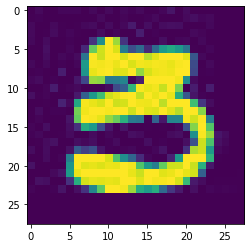

In [2]:
img_name = 'C:/Users/Maryam/Documents/PythonMaryam/MNIST/testSample/img_16.jpg'
img_np = cv2.imread(img_name, 0)/255.   #cv2.IMREAD_GRAYSCALE
plt.imshow(img_np)

#### read first 500 pix of digits from 0 to 10 as train data, do the same thing for next 100 pix to form the test set

In [10]:
X_train = []
y_train = []
for d in tqdm(range(0,10)):
    path = 'C:/Users/Maryam/Documents/PythonMaryam/MNIST/trainingSet/trainingSet/' + str(d) + "/"
    files = os.listdir(path)
    for file in files[:500]:
        img = cv2.imread(path + file, 0)/255
        img_flat = img.flatten()
        X_train.append(img_flat)
        y_train.append(d)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.18it/s]


In [11]:
X_test = []
y_test = []
for d in tqdm(range(0,10)):
    path = 'C:/Users/Maryam/Documents/PythonMaryam/MNIST/trainingSet/trainingSet/' + str(d) + "/"
    files = os.listdir(path)
    for file in files[500:600]:
        img = cv2.imread(path + file, 0)/255
        img_flat = img.flatten()
        X_test.append(img_flat)
        y_test.append(d)
        
X_test = np.array(X_test)
y_test = np.array(y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.66it/s]


#### Classifying data using Logistic Regression 

In [12]:
clf = lm.LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

pred_tr = clf.predict(X_train)
acc_tr = accuracy_score(y_train, pred_tr)
print('accuracy score of the logistic regression on train data is: ', acc_tr)

pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)

print('accuracy score of the logistic regression on test data is: ', acc)

accuracy score of the logistic regression on train data is:  0.9862
accuracy score of the logistic regression on test data is:  0.896


#### Dimension reduction with PCA

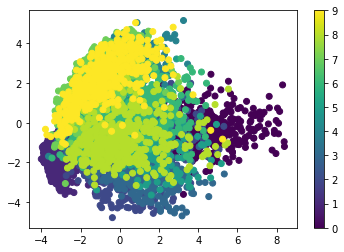

In [13]:
ncomp = 2
mypca = PCA(n_components=ncomp)
X_train_PCA = mypca.fit_transform(X_train)

plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1], c=y_train)
plt.colorbar()

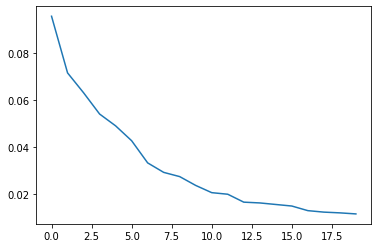

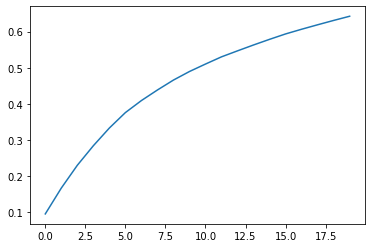

In [14]:
ncomp = 20
mypca = PCA(n_components=ncomp)
X_train_PCA = mypca.fit_transform(X_train)
plt.plot(mypca.explained_variance_ratio_)
plt.show()
plt.plot(np.cumsum(mypca.explained_variance_ratio_))
plt.show()
X_test_PCA = mypca.transform(X_test)

In [16]:
clf.fit(X_train_PCA,y_train)

pred2 = clf.predict(X_test_PCA)
acc2 = accuracy_score(y_test, pred2)
print('accuracy score with PCA with 20 components:',acc2)

accuracy score with PCA with 20 components: 0.881


####  Classifying data using Support Vector Machine

In [21]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

pred3 = svc.predict(X_test)
acc3 = accuracy_score(y_test, pred3)
print('accuracy score using SVM classifier: ', acc3)

accuracy score using SVM classifier:  0.924


#### Cross validation of SVC 

In [23]:
scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_macro')
print('Cross validation score for SVC classifier: ', scores)

Cross validation score for SVC classifier:  [0.9118201  0.87945497 0.88825848 0.90880217 0.9032159 ]
